In [1]:
%pylab inline
%run ../utils.py

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = get_data()

In [3]:
from matplotlib.colors import LogNorm
import seaborn as s
s.set(rc={'image.cmap': "jet"})
config_plots(rcParams)

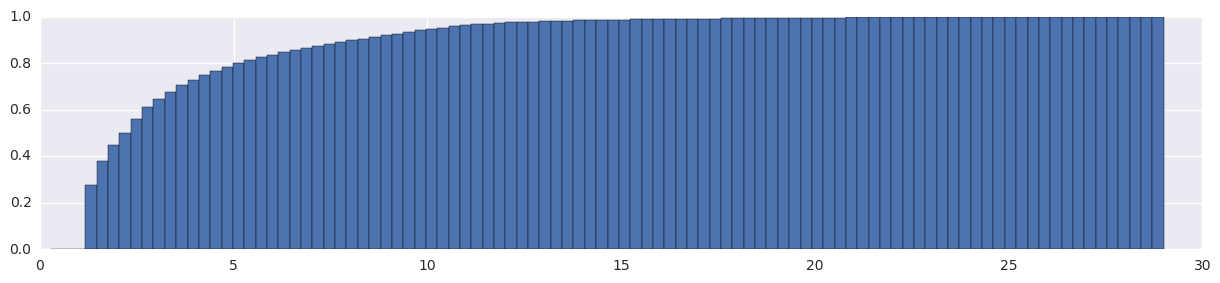

In [5]:
figsize(15,3)
data['Rcutoff'][data['Rcutoff']>0].hist(bins=np.linspace(0,29,100), cumulative=True, normed=True)

In [6]:
def dplot(name):
    args={"bins":np.linspace(0,10,100), "ax":gca(), "histtype":"step", "lw":2}
    data[name + '_P'][data[name + '_P']<10].hist(label='Protons',  color='r', **args)
    data[name + '_D'][data[name + '_D']<10].hist(label='Deuterons',color='b', **args)
    legend()
    xlabel(name)

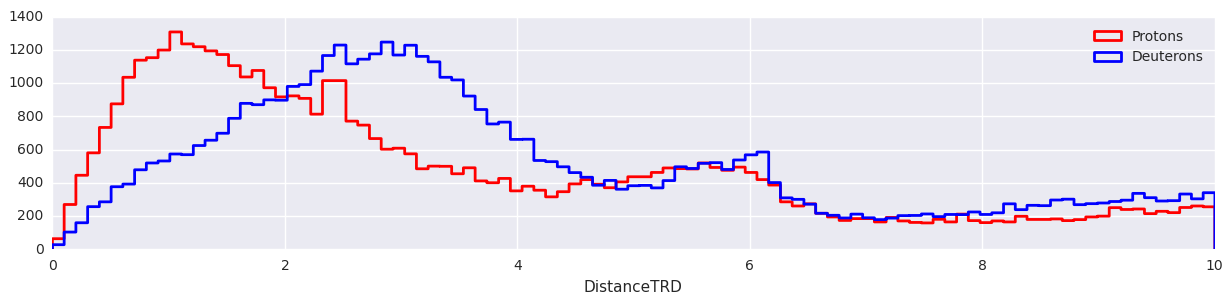

In [7]:
dplot('DistanceTRD')

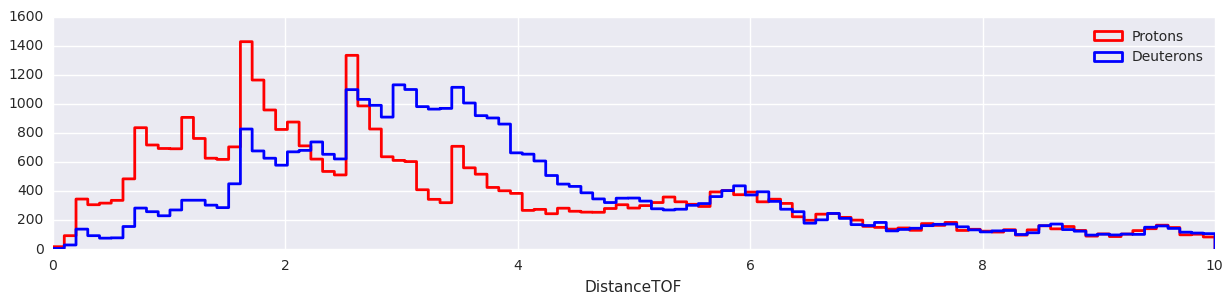

In [8]:
dplot('DistanceTOF')

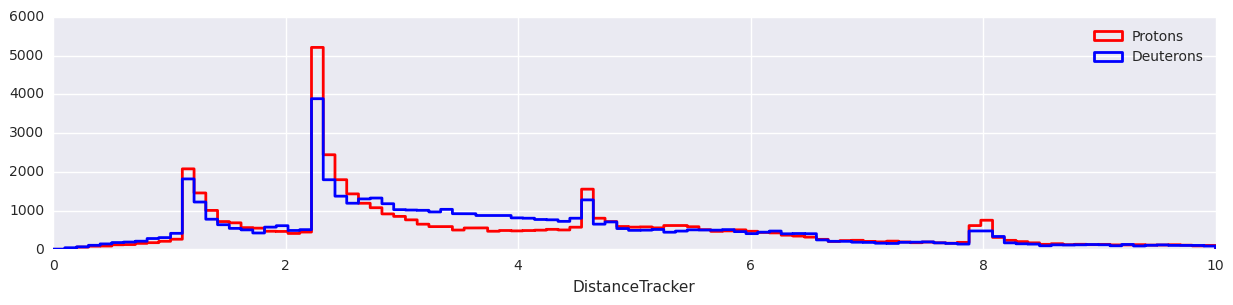

In [9]:
dplot('DistanceTracker')

(0.4, 1)

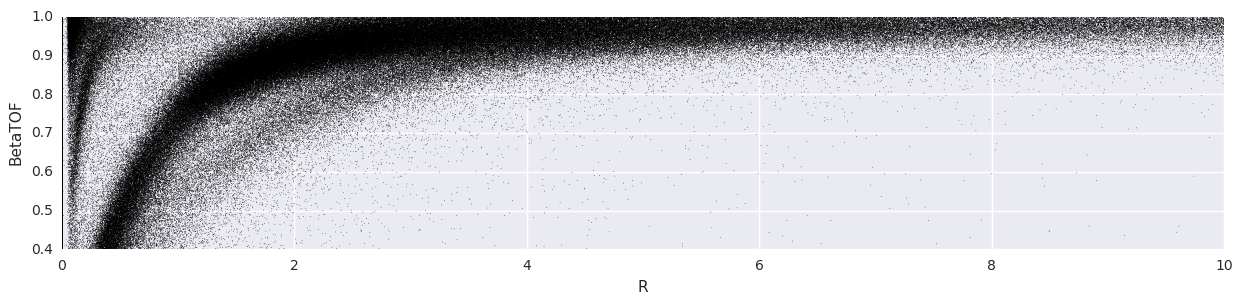

In [10]:
data.plot(x="R", y="BetaTOF", kind="scatter", c='k', marker='.', lw=0, s=1)
xlim(0,10); ylim(0.4,1)

(0.4, 1)

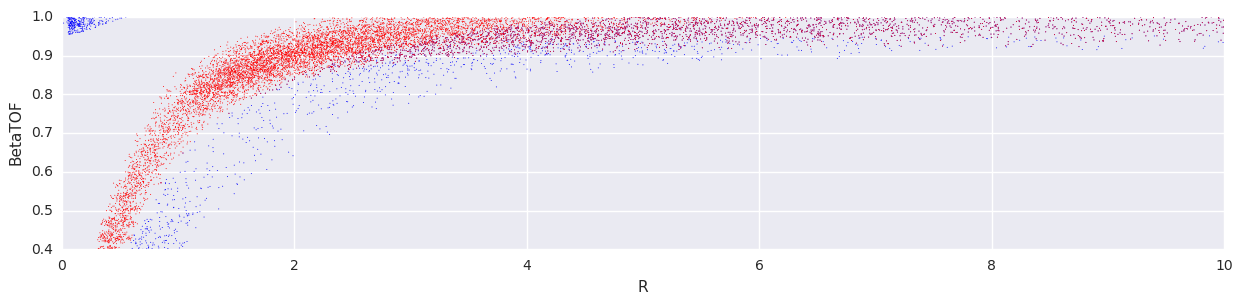

In [11]:
data[data['DistanceTOF_D']<2].plot(x="R", y="BetaTOF", kind="scatter", c='b', marker='.', lw=0, s=2, ax=gca())
data[data['DistanceTOF_P']<2].plot(x="R", y="BetaTOF", kind="scatter", c='r', marker='.', lw=0, s=2, ax=gca())
xlim(0,10); ylim(0.4,1)

(0.4, 1)

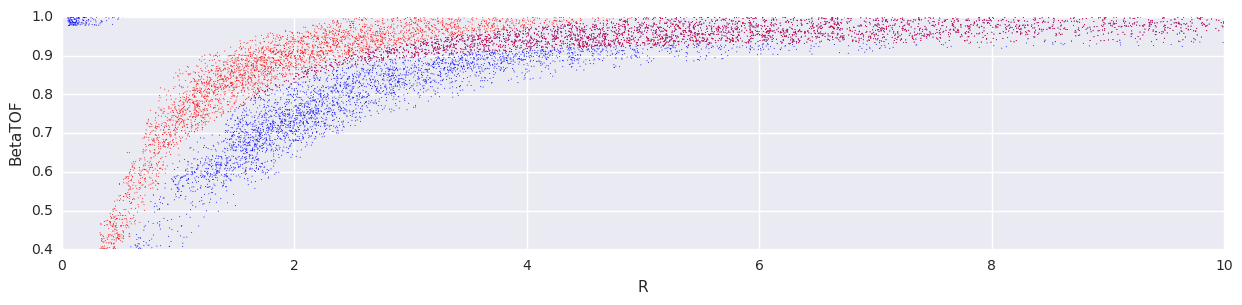

In [12]:
data[data['DistanceTracker_D']<2].plot(x="R", y="BetaTOF", kind="scatter", c='b', marker='.', lw=0, s=2, ax=gca())
data[data['DistanceTracker_P']<2].plot(x="R", y="BetaTOF", kind="scatter", c='r', marker='.', lw=0, s=2, ax=gca())
xlim(0,10); ylim(0.4,1)

(0.4, 1)

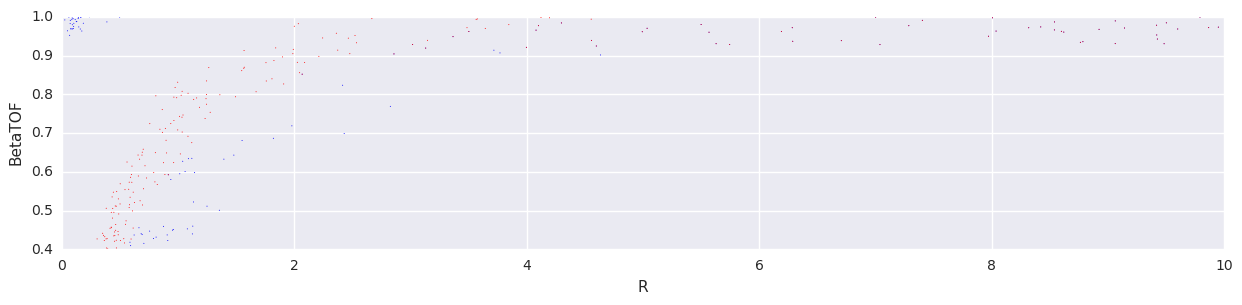

In [12]:
data[data['DistanceTRD_D']<2].plot(x="R", y="BetaTOF", kind="scatter", c='b', marker='.', lw=0, s=2, ax=gca())
data[data['DistanceTRD_P']<2].plot(x="R", y="BetaTOF", kind="scatter", c='r', marker='.', lw=0, s=2, ax=gca())
xlim(0,10); ylim(0.4,1)

In [14]:
%run Functions.py

In [15]:
data['DistanceTRD_D'].describe()

count     100000.000000
mean      955580.450643
std       206025.306275
min            0.037841
25%      1000000.000000
50%      1000000.000000
75%      1000000.000000
max      1000000.000000
Name: DistanceTRD_D, dtype: float64

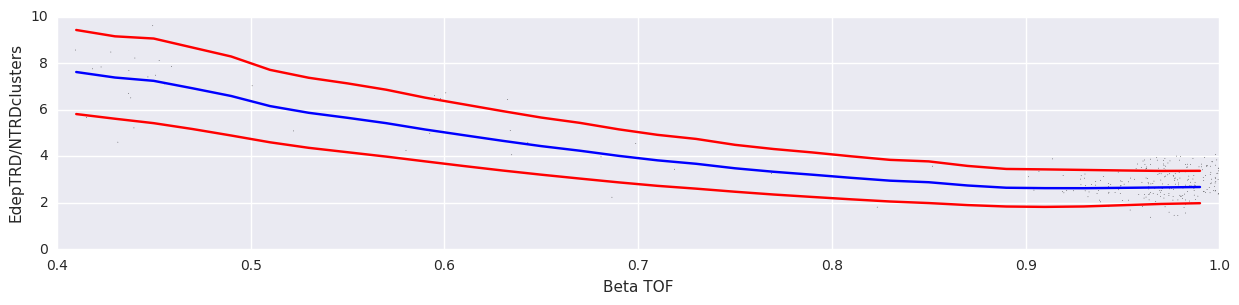

In [16]:
d = data[data['DistanceTRD_D']<2]
scatter(d['BetaTOF'], d['EdepTRD']/d['NTRDclusters'], c='k', s=1, marker='.', lw=0)
plot(Beta_cent,ETRD,'b')
plot(Beta_cent,ETRD+sigmaETRDinv*(ETRD**2),'r')
plot(Beta_cent,ETRD-sigmaETRDinv*(ETRD**2),'r')
xlim(0.4,1.0); ylim(0,10)
xlabel("Beta TOF"); ylabel("EdepTRD/NTRDclusters")

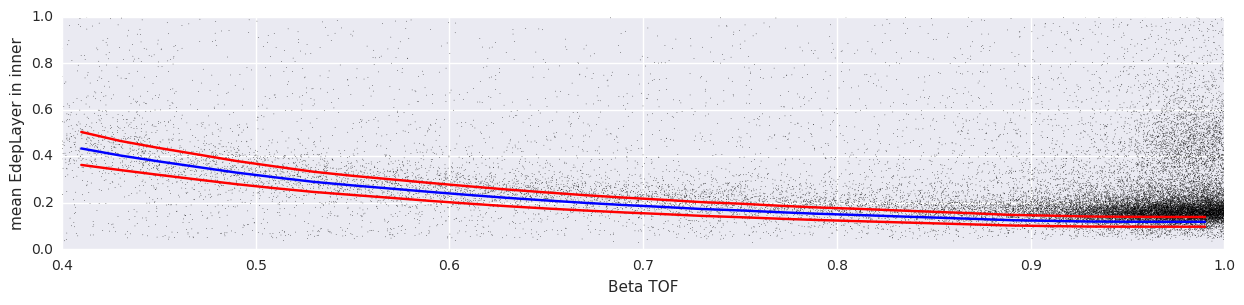

In [23]:
sel = lambda s: [ c for c in data.columns 
    if c.startswith(s) and c[-1] not in ["0"] ]
d = data#[data['DistanceTracker_P']<3]
etrack = d[sel("EDepLayer")].sum(axis=1)/14
scatter(d['BetaTOF'], etrack, c='k', s=1, marker='.', lw=0)
plot(Beta_cent,ETrack,'b')
plot(Beta_cent,ETrack+sigmaEtrackinv*(ETrack**2),'r')
plot(Beta_cent,ETrack-sigmaEtrackinv*(ETrack**2),'r')
xlim(0.4,1.0); ylim(0,1)
xlabel("Beta TOF"); ylabel("mean EdepLayer in inner")

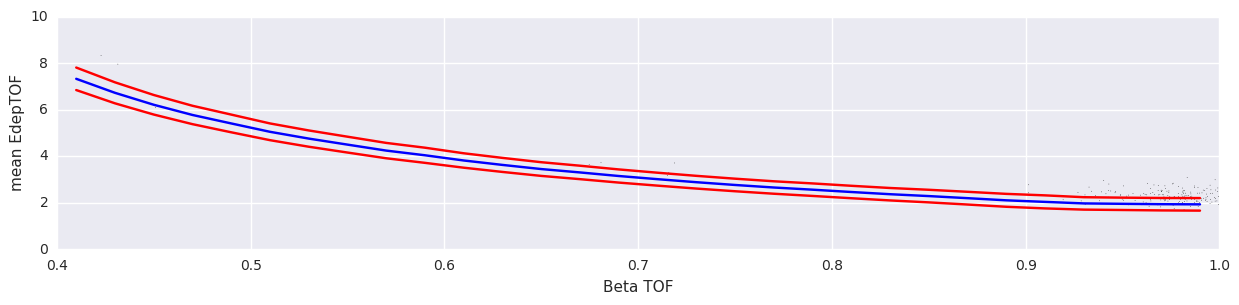

In [18]:
sel = lambda s: [ c for c in data.columns if c.startswith(s) ]
d = data[data['DistanceTOF_D']<2]
scatter(d['BetaTOF'], d[sel('EdepTOF')].mean(axis=1), c='k', s=1, marker='.', lw=0)
plot(Beta_cent,ETOF,'b')
plot(Beta_cent,ETOF+sigmaEtofinv*(ETOF**2),'r')
plot(Beta_cent,ETOF-sigmaEtofinv*(ETOF**2),'r')
xlim(0.4,1.0); ylim(0,10)
xlabel("Beta TOF"); ylabel("mean EdepTOF")